## TODO:
* when eta is high, the battery will charge and discharge more often. This leads to alot of dots in the 2nd figure. 
* run code for 2 setups with high (realistic) and low eta

In [173]:
%load_ext autoreload
%autoreload 2
from tools import EnergyStorageModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import numpy as np
# how do align 

## ETA HIGH

In [218]:
model.policy.shape

(21, 55)

In [270]:
# Example Usage:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.99,
                           a_bar = 4,
                           num_storage_levels=21,
                           num_actions=25,
                           num_price_levels=22,
                           simulate_prices = True,
                           tolerance = 1e-2,
                           max_iteration=10_000,
                           mean_reversion= 0.2,
                           p_variance = 100)


Simulating price series...


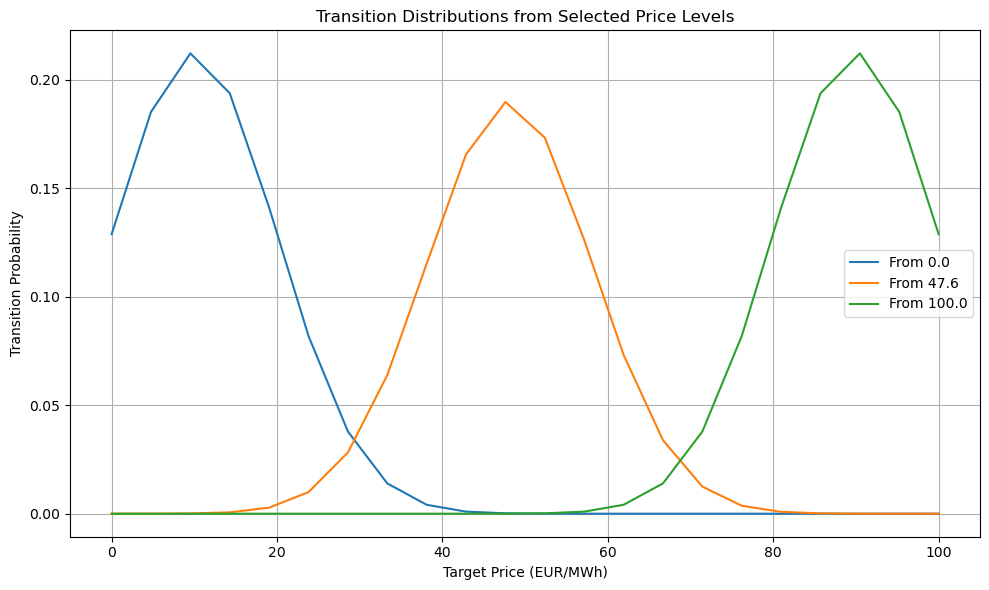

In [271]:
model.plot_price_transition_distributions()

heyo
Converged in 675 iterations.


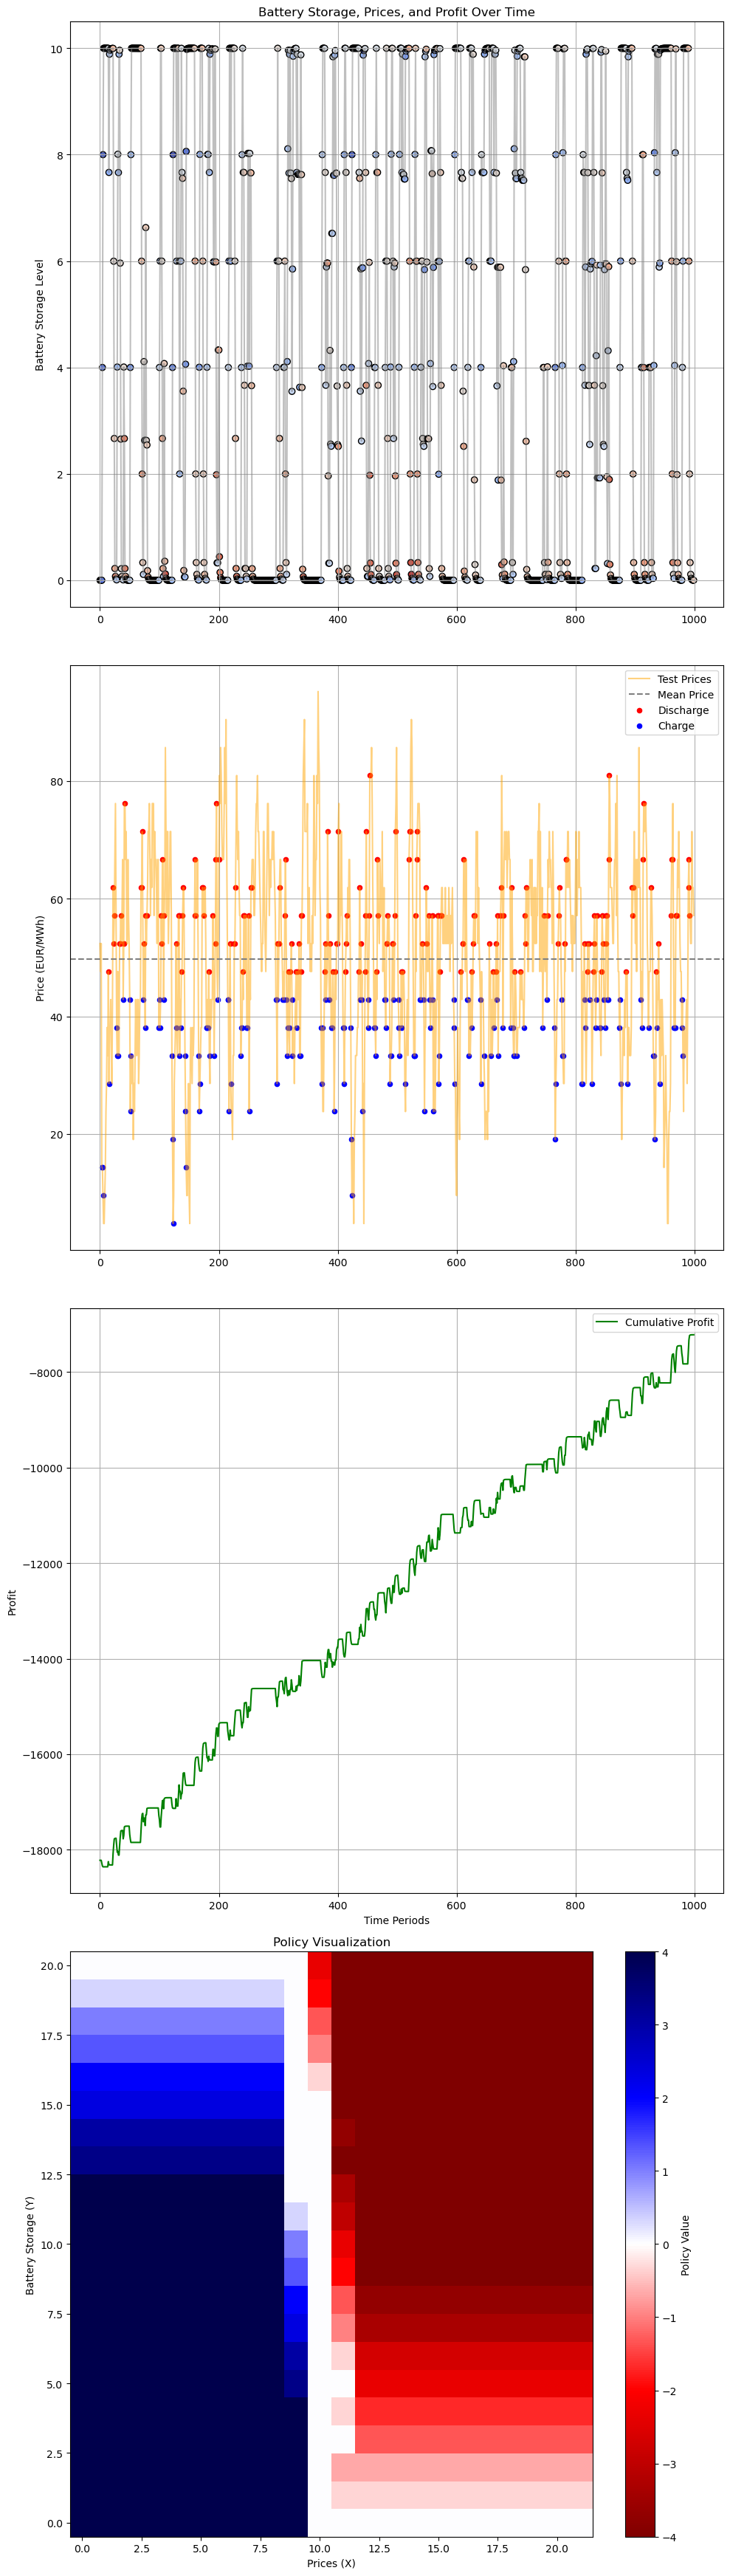

In [272]:
v2, p2 = model.vfi_vec()
battery_storage_sim, profit_sim, action_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim, action_sim)

In [234]:
action_sim[0:100]

array([ 0.00000000e+00,  4.00000000e+00, -3.66666667e+00,  4.00000000e+00,
        4.00000000e+00,  1.55603702e+00,  7.42253018e-02,  2.50164523e-02,
        8.61555287e-03,  3.14926975e-03, -1.99734519e+00, -1.64745245e-04,
       -4.00000000e+00,  2.00077906e+00, -4.00000000e+00,  4.00000000e+00,
        2.03468636e-04,  2.34481067e-04, -1.33308852e+00,  4.00000000e+00,
        1.22260010e+00, -4.00000000e+00, -4.00000000e+00, -1.59178768e+00,
       -1.97210124e-01, -6.57284908e-02, -2.19067582e-02,  4.00000000e+00,
        4.00000000e+00,  1.98562076e+00, -4.00000000e+00,  4.00000000e+00,
        3.06327655e-03, -4.00000000e+00, -4.00000000e+00, -1.66492360e+00,
        6.64757151e-01, -6.64747918e-01, -2.21554942e-01,  4.00000000e+00,
        0.00000000e+00, -3.74039182e+00, -2.46683090e-01, -8.22174181e-02,
       -2.74023803e-02,  4.00000000e+00,  1.99086740e+00, -4.00000000e+00,
        0.00000000e+00,  3.99728975e+00,  3.99830450e+00,  4.49284738e-04,
        4.27520637e-04,  

In [ ]:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.9999,
                           a_bar = 4,
                           num_storage_levels=20,
                           num_actions=21,
                           num_price_levels=10,
                           simulate_prices = True,
                           tolerance = 1e-2,
                           max_iteration=100_000)
v1, p1 = model.vfi_vec()
battery_storage_sim, profit_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim)

In [ ]:
print(np.allclose(p1,p2))
p1-p2

In [ ]:
print(np.allclose(v1,v2))
v1-v2

## ETA LO

In [ ]:
model_2 = EnergyStorageModel(price_data_path='../data/entsoe_price_DK_1_20150101_20240101.csv',
                             eta_charge=0.85,
                             eta_discharge=0.85,
                             num_actions=13)
model_2.compute_price_transitions()
V2, P2 = model_2.value_function_iteration()
battery_storage_sim, profit_sim = model_2.simulate()
model_2.plot_results(battery_storage_sim, profit_sim)
